# MA124 Maths by Computer: Submission 2 for Assignment 3
## Geometric Brownian Motion 

**Student ID:** _2003869_

The stochastic differential equation

$$
\dot S(t) = \mu S(t) + \sigma S(t) \xi(t)
$$

plays a central role in mathematical finance. This equation describes what is known as [Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion).  
> - $S(t)$ is taken to be positive and represents the **_value of a stock_** at time $t$. 
> - $\dot S(t) = \mu S(t)$, the **_deterministic ODE_**, describes exponential growth in the value of a stock. 
> - $\mu$ is the **_growth rate_** and we consider $\mu > 0$.
> - $\sigma S(t) \xi(t)$ describes **_fluctuations in the value of a stock_**. 
> - $\xi(t)$ is a Gaussian **_random variable_**. 
> - The parameter $\sigma > 0$ is known as the **_volatility_**. We assume values for $\sigma$ are between $0.1$ and $0.4$. We will take $\sigma$ as 0.25.

Note that the fluctuating term contains $S(t)$ itself. This models the fact that fluctuations in a stock price are proportional to the price. 

> - **Time** $t$ is measured in _years_. 
> - Typical values for $\mu$ are between $0.01$ and $0.10$, corresponding to 1% and 10% **annual growth** (non-compounded). We will take $\mu$ as 0.05.

Below, I will implement a function to solve such an equation, which I then plot for various sample paths. 
We will let:
> - $t_f = 5$ (corresponding to 5 years time)
> - $S_0 = 100$ (corresponding to the intial stock price)

Following on from that, I will increase the number of sample paths considered to further analyse the general behaviour of S over time, by plotting the mean +/- standard deviation. 

Finally, from the graph just produced, I will plot a histogram comparing the distribution of the value of the stock at three distinct points in time on the 2000 sample paths (and go on to plot the associated normal distribution). One, **<font color='green'>$\frac{5}{4}$ years</font>** ahead in time, the second **<font color='orange'>$\frac{10}{3}$ years</font>** ahead, and lastly the distribution for **<font color='red'>5 years</font>** ahead in time. 


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#Implementation
def SDE_GBM(S0, tf, mu, sigma, Npaths):
    Nsteps = 365*tf
    
    # Generate the time grid and solution array
    t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
    S = np.zeros(shape = (Nsteps+1,Npaths))
    rootDt = np.sqrt(dt)
  
    # Time step starting from initial condition
    S[0,:] = S0;
    for n in range(Nsteps):
        S[n+1,:] = S[n,:] * (1 + (dt * mu) + (sigma * rootDt * np.random.randn(Npaths)))
    return t, S

In [3]:
# Problem setup. 
# Set model and numerical parameters, and the initial condition.
S0 = 100
tf = 5
mu = 0.05
sigma = 0.25

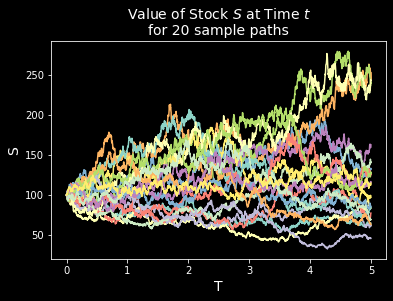

In [4]:
# Plot paths first for 50 sample paths
plt.style.use('dark_background')
Npaths = 20
t, S = SDE_GBM(S0, tf, mu, sigma, Npaths)
plt.plot(t,S)
plt.xlabel("T", fontsize=14)
plt.ylabel("S", fontsize=14)
plt.title(r'Value of Stock $S$ at Time $t$''\n''for '+str(Npaths)+' sample paths', fontsize=14)
plt.show()

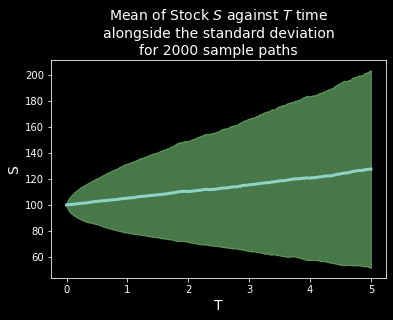

In [5]:
# call function for 2000 sample paths
# Compute the mean and standard deviation as function of time
Npaths = 2000
t, S = SDE_GBM(S0, tf, mu, sigma, Npaths)
S_mean = np.mean(S,1)
S_std = np.std(S,1)

# Plot shaded region between X_mean - X_std and X_mean + X_std 
plt.fill_between(t, 
                 S_mean - S_std, 
                 S_mean + S_std, 
                 alpha=0.5, color="lightgreen")

# Plot the mean itself
plt.plot(t,S_mean, linewidth=3)
plt.xlabel("T", fontsize=14)
plt.ylabel("S", fontsize=14)
plt.title(r'Mean of Stock $S$ against $T$ time''\n''alongside the standard deviation''\n''for '+str(Npaths)+' sample paths', fontsize=14)
plt.show()

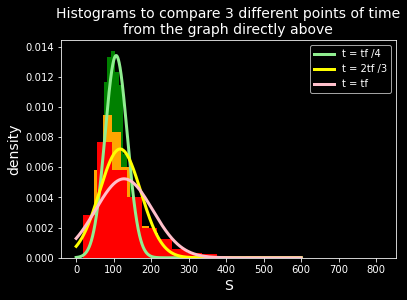


A quarter of the way through
The mean stock value S is : 106.61436311316288
With a standard deviation of : 29.748882769808436

Two thirds of the way through
The mean stock value S is : 117.34784369434561
With a standard deviation of : 55.308345133115715

By the end of all time elasped
The mean stock value S is : 127.67409216659298
With a standard deviation of : 76.1735148153399


In [6]:
# Plot histograms to compare three different points of time from the graphs above 
plt.style.use('dark_background')

plt.hist(S[round(365*tf/4),:], bins = 20, density=True, color='green')    #when t is  tf / 4
plt.hist(S[round(2*365*tf/3),:], bins = 20, density=True, color='orange') #when t is  2 * tf / 3  
plt.hist(S[-1,:], bins = 20, density=True, color='red')                   #when t = final time

#find mean and standard deviations for the different times 
firstMean = np.mean(S[round(365*tf/4),:])
firstStndDev = np.std(S[round(365*tf/4),:])
secndMean = np.mean(S[round(2*365*tf/3),:])
secndStndDev = np.std(S[round(2*365*tf/3),:])
finalMean = np.mean(S[-1,:])
finalStndDev = np.std(S[-1,:])

# plot normal distribution with mean and standard distribution relative to each time chosen
maxTime = 6000
x = np.linspace(0 ,600, maxTime)

y = norm.pdf(x, firstMean, firstStndDev)
plt.plot(x, y,color="lightgreen", lw=3, label="t = tf /4")

y = norm.pdf(x, secndMean, secndStndDev)
plt.plot(x, y,color="yellow", lw=3, label="t = 2tf /3")

y = norm.pdf(x, finalMean, finalStndDev)
plt.plot(x, y,color="pink", lw=3, label="t = tf")

plt.xlabel("S", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.title("Histograms to compare 3 different points of time""\n""from the graph directly above", fontsize=14)
plt.legend()
plt.show()

#print corresponding values for the mean and standard distributions for different times
print()
print("A quarter of the way through")
print("The mean stock value S is :",firstMean)
print("With a standard deviation of :",firstStndDev)
print()
print("Two thirds of the way through")
print("The mean stock value S is :",secndMean)
print("With a standard deviation of :",secndStndDev)
print()
print("By the end of all time elasped")
print("The mean stock value S is :",finalMean)
print("With a standard deviation of :",finalStndDev)

Note, I've just used a black backdrop here so that the colours better standout on the graphs.

>Note how the **mean** over time slowly shifts to the right on the histogram, which can be seen on the middle graph as the mean can be seen to slowly increase over time, representing how the average stock price grows gradually with $t$. This growth we would expect to be directly linked to our choice of parameter $\mu = 0.05$.

>However it can be also seen that the _width_ or _spread_ of the histogram alongwith the associated normal distribution increases too (i.e the **standard deviation** increases over time, which can be seen in the middle graph as the green area increases with $t$). This just represents the random nature of $S(t)$ and the uncertainty there is surrounding the true value of what the stock price _S_ would be as time _t_ goes on. 

>This can be especially seen - this random and uncertain nature - when you look at the 20 individual sample paths in the initial graph plotted when you look at the paths fluctuating so much. The volatility of these fluctuations we would also expect to be a result of our choice of $\sigma = 0.25$.